# Convolutional Neural Networks - Build Model
---
In this notebook, we build and train a **CNN** to classify images from the CIFAR-10 database. 
* The code provided here are **almost** working. You are required to build up a CNN model and train it.
* Make sure you covered implementations of the **TODO**s in this notebook

The images in this database are small color images that fall into one of ten classes; some example images are pictured below.

<img src='cifar_data.png' width=50% height=50% />

### Optional: Use [CUDA](http://pytorch.org/docs/stable/cuda.html) if Available

Since these are color (32x32x3) images, it may prove useful to speed up your training time by using a GPU. CUDA is a parallel computing platform and CUDA Tensors are the same as typical Tensors, but they utilize GPU's for effcient parallel computation.

In [1]:
import sys
print(sys.executable)
print(sys.version)

/opt/anaconda3/bin/python3.12
3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 10:07:17) [Clang 14.0.6 ]


In [2]:
!pip install torch torchvision torchaudio

In [3]:
import torch
import numpy as np

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

/opt/anaconda3/lib/python3.12/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


CUDA is not available.  Training on CPU ...


## Load the [Data](http://pytorch.org/docs/stable/torchvision/datasets.html)
---
Downloading may take a minute. We load in the training and test data, split the training data into a training and validation set, then create DataLoaders for each of these sets of data.

In [4]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2

# convert data to a normalized torch.FloatTensor
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

# choose the training and test datasets
train_data = datasets.CIFAR10('data', train=True,
                              download=True, transform=transform)
test_data = datasets.CIFAR10('data', train=False,
                             download=True, transform=transform)

# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

### Visualize a Batch of Training Data

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

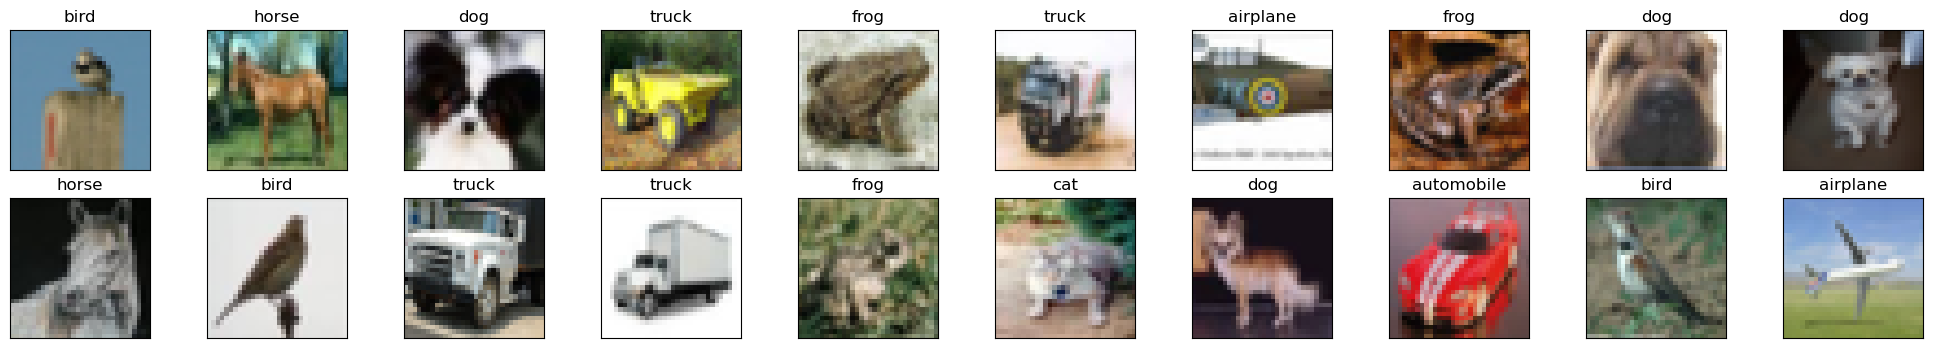

In [6]:
# obtain one batch of training images
dataiter = iter(train_loader)
#images, labels = dataiter.next() #python, torchvision version match issue
images, labels = next(dataiter)
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

### View an Image in More Detail

Here, we look at the normalized red, green, and blue (RGB) color channels as three separate, grayscale intensity images.

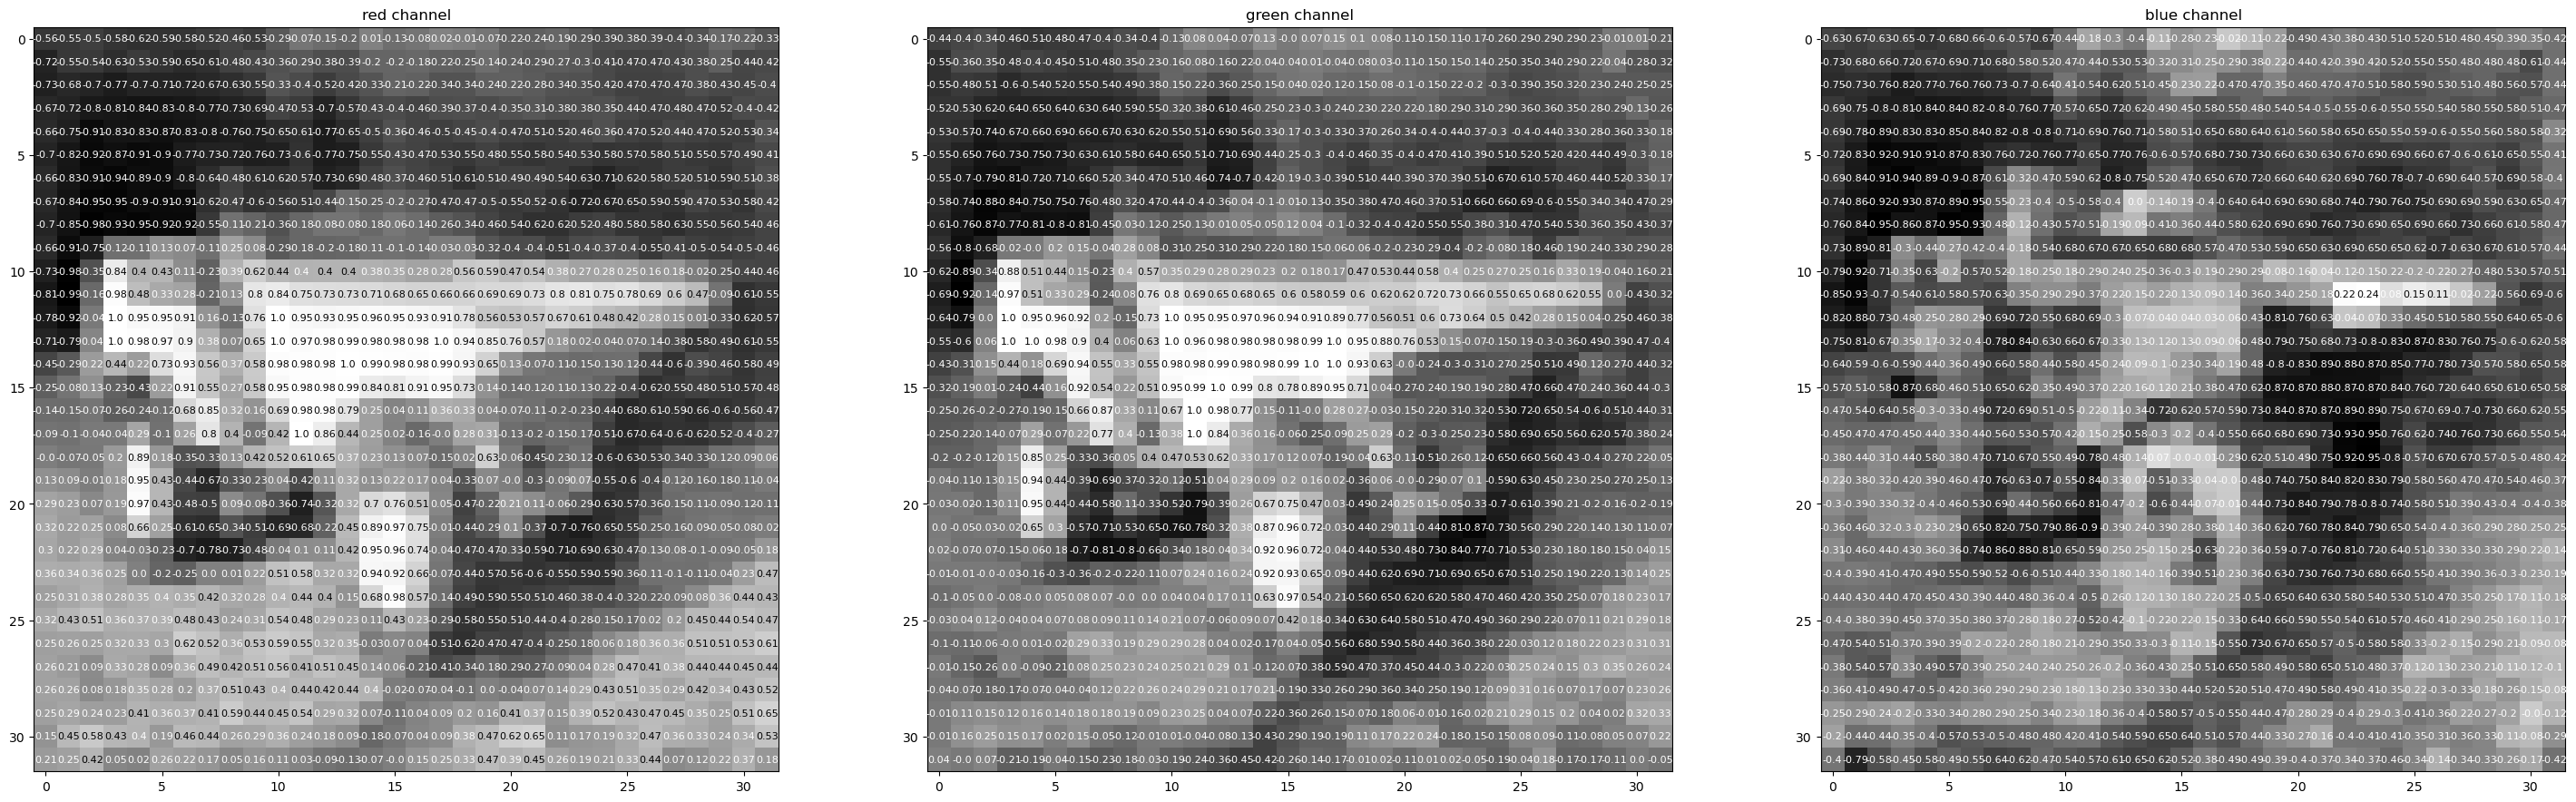

In [7]:
rgb_img = np.squeeze(images[3])
channels = ['red channel', 'green channel', 'blue channel']

fig = plt.figure(figsize = (36, 36)) 
for idx in np.arange(rgb_img.shape[0]):
    ax = fig.add_subplot(1, 3, idx + 1)
    img = rgb_img[idx]
    ax.imshow(img, cmap='gray')
    ax.set_title(channels[idx])
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            val = round(img[x][y],2) if img[x][y] !=0 else 0
            ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center', size=8,
                    color='white' if img[x][y]<thresh else 'black')

## **TODO**: Define the Network [Architecture](http://pytorch.org/docs/stable/nn.html)
---
Build up your own Convolutional Neural Network using Pytorch API:
- nn.Conv2d(): for convolution
- nn.MaxPool2d(): for maxpooling (spatial resolution reduction)
- nn.Linear(): for last 1 or 2 layers of fully connected layer before the output layer.
- nn.Dropout(): optional, [dropout](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html) can be used to avoid overfitting.
- F.relu(): Use ReLU as the activation function for all the hidden layers

The following is a skeleton example that's not completely working. 

In [8]:
 #https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
        # in_channels (int) – Number of channels in the input image
        # out_channels (int) – Number of channels produced by the convolution
        # kernel_size (int or tuple) – Size of the convolving kernel
        # stride (int or tuple, optional) – Stride of the convolution. Default: 1
        
        # padding (int, tuple or str, optional) – Padding added to all four sides of the input. Default: 0
        
        # dilation (int or tuple, optional) – Spacing between kernel elements. Default: 1
        
        # groups (int, optional) – Number of blocked connections from input channels to output channels. Default: 1
        
        # bias (bool, optional) – If True, adds a learnable bias to the output. Default: True
        
        # padding_mode (str, optional) – 'zeros', 'reflect', 'replicate' or 'circular'. Default: 'zeros'
        #nn.sequential() to group layers together, https://learning.oreilly.com/library/view/machine-learning-with/9781801819312/Text/Chapter_14.xhtml#_idParaDest-298
        #https://pytorch.org/docs/main/generated/torch.nn.Sequential.html#sequential

In [9]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # TOTO: Build multiple convolutional layers (sees 32x32x3 image tensor in the first hidden layer)
        # for example, conv1, conv2 and conv3
       
        self.conv_layers = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  
            
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  
            
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)  
        )
        
        #pass
        
        # max pooling layer
        #self.pool = nn.MaxPool2d(2, 2)
        
        # TODO: Build some linear layers (fully connected)
        # for example, fc1 and fc2
        
        #pass

        # TODO: dropout layer (p=0.25, you can adjust)
        # example 
        
        self.fc_layers = nn.Sequential(
            nn.Flatten(),  
            nn.Linear(128 * 4 * 4, 512),  
            nn.ReLU(),  
            nn.Linear(512, 10)  
        )

        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        # assume we have 2 convolutional layers defined agove
        # and we do a maxpooling after each conv layer
        # x = self.pool(F.relu(self.conv1(x)))
        # x = self.pool(F.relu(self.conv2(x
        x = self.conv_layers(x)

        # TODO: flatten x at this point to get it ready to feed into the fully connected layer(s)
        # Can use this but need to figure out the actual value for a, b and c
        # x = x.view(-1, a * b * c)
        x = x.view(x.size(0), -1)

        # optional add dropout layer
        #x = self.dropout(x)
        
        # add 1st hidden layer, with relu activation function
        # x = F.relu(self.fc1(x))
        x = self.fc_layers(x)
        # optional add dropout layer
        #x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        # x = self.fc2(x)
        return x

# create a complete CNN
model = Net()
print(model)

# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()

Net(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2048, out_features=512, bias=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=10, bias=True)
  )
  (dropout): Dropout(p=0.25, inplace=False)
)


### Specify [Loss Function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [Optimizer](http://pytorch.org/docs/stable/optim.html)
---
Decide on a loss and optimization function that is best suited for this classification task. The linked code examples from above, may be a good starting point; [this PyTorch classification example](https://github.com/pytorch/tutorials/blob/master/beginner_source/blitz/cifar10_tutorial.py) Pay close attention to the value for **learning rate** as this value determines how your model converges to a small error.

The following is working code, but you can make your own adjustments.

**TODO**: try to compare with ADAM optimizer

In [10]:
import torch.optim as optim

# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer_sgd = optim.SGD(model.parameters(), lr=0.01)

# TODO, compare with optimizer ADAM https://pytorch.org/docs/stable/generated/torch.optim.Adam.html
optimizer_adam= optim.Adam(model.parameters(), lr=0.001)


In [11]:
# We have defined adam optimer as well. 
#Now to compare these two we will have to train our model separately using each optimizer.

## Train the Network
---
Remember to look at how the training and validation loss decreases over time; if the validation loss ever increases it indicates possible overfitting.

The following is working code, but you are encouraged to make your own adjustments and enhance the implementation.

In [12]:
#USING SGD OPTIMIZER, saved as model_trained.pt

Epoch: 1 	Training Loss: 1.990474 	Validation Loss: 1.649160
Validation loss decreased (inf --> 1.649160).  Saving model ...
Epoch: 2 	Training Loss: 1.511450 	Validation Loss: 1.479696
Validation loss decreased (1.649160 --> 1.479696).  Saving model ...
Epoch: 3 	Training Loss: 1.327038 	Validation Loss: 1.259017
Validation loss decreased (1.479696 --> 1.259017).  Saving model ...
Epoch: 4 	Training Loss: 1.188040 	Validation Loss: 1.211035
Validation loss decreased (1.259017 --> 1.211035).  Saving model ...
Epoch: 5 	Training Loss: 1.069489 	Validation Loss: 1.059125
Validation loss decreased (1.211035 --> 1.059125).  Saving model ...
Epoch: 6 	Training Loss: 0.966202 	Validation Loss: 0.986683
Validation loss decreased (1.059125 --> 0.986683).  Saving model ...
Epoch: 7 	Training Loss: 0.875771 	Validation Loss: 0.935377
Validation loss decreased (0.986683 --> 0.935377).  Saving model ...
Epoch: 8 	Training Loss: 0.791585 	Validation Loss: 0.852735
Validation loss decreased (0.93537

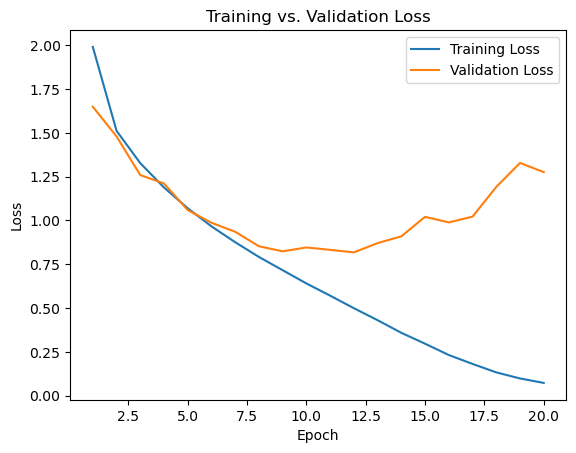

In [14]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

n_epochs = 20

#to store valid and train data
train_losses = []
valid_losses = []

valid_loss_min = np.Inf

for epoch in range(1, n_epochs+1):
    train_loss = 0.0
    valid_loss = 0.0

    model.train()  

    for batch_idx, (data, target) in enumerate(train_loader):
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        
        # clear the gradients of all optimized variables
        optimizer_sgd.zero_grad()
        
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer_sgd.step()
    
        train_loss += loss.item() * data.size(0)
    
    model.eval()  

    for batch_idx, (data, target) in enumerate(valid_loader):
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        
        # calculate the batch loss
        loss = criterion(output, target)
        
        # update the *summed* validation loss
        valid_loss += loss.item() * data.size(0)
    
    # calculate *average* losses
    train_loss = train_loss / len(train_loader.sampler)
    valid_loss = valid_loss / len(valid_loader.sampler)
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min, valid_loss))
        torch.save(model.state_dict(), 'model_trained.pt')
        valid_loss_min = valid_loss
#PLOT
epochs_range = range(1, n_epochs+1)
plt.plot(epochs_range, train_losses, label='Training Loss')
plt.plot(epochs_range, valid_losses, label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
# validation loss is increasing overtime and training loss is decreasing suggesting to overfitting. 

In [16]:
#test for SGD optimizer model
model.load_state_dict(torch.load('model_trained.pt'))

<All keys matched successfully>

In [17]:
#TEST

In [18]:
# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()
# iterate over test data
for batch_idx, (data, target) in enumerate(test_loader):
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.858644

Test Accuracy of airplane: 81% (813/1000)
Test Accuracy of automobile: 81% (818/1000)
Test Accuracy of  bird: 68% (688/1000)
Test Accuracy of   cat: 46% (468/1000)
Test Accuracy of  deer: 67% (677/1000)
Test Accuracy of   dog: 64% (646/1000)
Test Accuracy of  frog: 80% (807/1000)
Test Accuracy of horse: 67% (671/1000)
Test Accuracy of  ship: 82% (823/1000)
Test Accuracy of truck: 76% (762/1000)

Test Accuracy (Overall): 71% (7173/10000)


In [19]:
#USING ADAM

Epoch: 1 	Training Loss: 0.098661 	Validation Loss: 2.202429
Validation loss decreased (inf --> 2.202429).  Saving model ...
Epoch: 2 	Training Loss: 0.104618 	Validation Loss: 2.134283
Validation loss decreased (2.202429 --> 2.134283).  Saving model ...
Epoch: 3 	Training Loss: 0.084598 	Validation Loss: 2.329465
Epoch: 4 	Training Loss: 0.096436 	Validation Loss: 2.235240
Epoch: 5 	Training Loss: 0.090058 	Validation Loss: 2.269914
Epoch: 6 	Training Loss: 0.087094 	Validation Loss: 2.452368
Epoch: 7 	Training Loss: 0.089948 	Validation Loss: 2.559752
Epoch: 8 	Training Loss: 0.079602 	Validation Loss: 2.621309
Epoch: 9 	Training Loss: 0.086925 	Validation Loss: 2.697114
Epoch: 10 	Training Loss: 0.084654 	Validation Loss: 2.720705
Epoch: 11 	Training Loss: 0.100677 	Validation Loss: 2.715996
Epoch: 12 	Training Loss: 0.078913 	Validation Loss: 2.807835
Epoch: 13 	Training Loss: 0.085019 	Validation Loss: 2.871563
Epoch: 14 	Training Loss: 0.071105 	Validation Loss: 2.898195
Epoch: 1

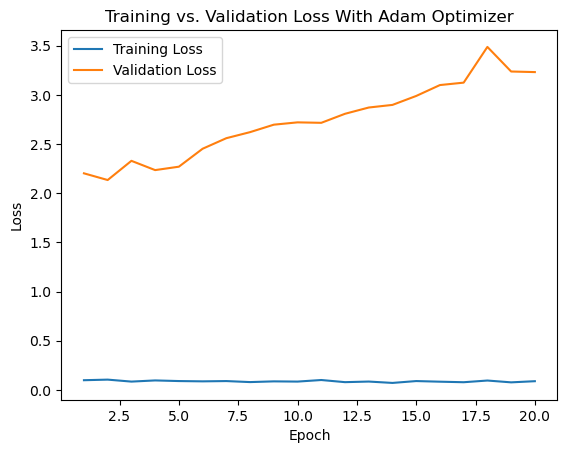

In [23]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

n_epochs = 20

#to store valid and train data
train_losses = []
valid_losses = []

valid_loss_min = np.Inf

for epoch in range(1, n_epochs+1):
    train_loss = 0.0
    valid_loss = 0.0

    model.train()  

    for batch_idx, (data, target) in enumerate(train_loader):
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        
        # clear the gradients of all optimized variables
        optimizer_adam.zero_grad()
        
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer_adam.step()
    
        train_loss += loss.item() * data.size(0)
    
    model.eval()  

    for batch_idx, (data, target) in enumerate(valid_loader):
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        
        # calculate the batch loss
        loss = criterion(output, target)
        
        # update the *summed* validation loss
        valid_loss += loss.item() * data.size(0)
    
    # calculate *average* losses
    train_loss = train_loss / len(train_loader.sampler)
    valid_loss = valid_loss / len(valid_loader.sampler)
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min, valid_loss))
        torch.save(model.state_dict(), 'model_trained_adam.pt')
        valid_loss_min = valid_loss
#PLOT
epochs_range = range(1, n_epochs+1)
plt.plot(epochs_range, train_losses, label='Training Loss')
plt.plot(epochs_range, valid_losses, label='Validation Loss')
plt.title('Training vs. Validation Loss With Adam Optimizer')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
#test for SGD optimizer model
model.load_state_dict(torch.load('model_trained_adam.pt'))

<All keys matched successfully>

In [25]:
# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()
# iterate over test data
for batch_idx, (data, target) in enumerate(test_loader):
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 2.159693

Test Accuracy of airplane: 73% (735/1000)
Test Accuracy of automobile: 84% (840/1000)
Test Accuracy of  bird: 62% (627/1000)
Test Accuracy of   cat: 52% (527/1000)
Test Accuracy of  deer: 66% (661/1000)
Test Accuracy of   dog: 67% (670/1000)
Test Accuracy of  frog: 81% (810/1000)
Test Accuracy of horse: 70% (708/1000)
Test Accuracy of  ship: 84% (844/1000)
Test Accuracy of truck: 72% (729/1000)

Test Accuracy (Overall): 71% (7151/10000)


###  Load the Model with the Lowest Validation Loss
This is the model we will use for testing, which is the model we saved in the last step

In [28]:
#test for SGD optimizer model
model.load_state_dict(torch.load('model_trained.pt'))

<All keys matched successfully>

## Test the Trained Network
---
Test your trained model on previously unseen data! Remember we have downloaded `train_data` and `test_data`. We will use `test_data` through `test_loader`.

A "good" result will be a CNN that gets around 70% (or more, try your best!) accuracy on these test images.

The following is working code, but you are encouraged to make your own adjustments and enhance the implementation.

In [29]:
# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()
# iterate over test data
for batch_idx, (data, target) in enumerate(test_loader):
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.846499

Test Accuracy of airplane: 65% (652/1000)
Test Accuracy of automobile: 82% (828/1000)
Test Accuracy of  bird: 77% (779/1000)
Test Accuracy of   cat: 41% (413/1000)
Test Accuracy of  deer: 60% (605/1000)
Test Accuracy of   dog: 63% (631/1000)
Test Accuracy of  frog: 83% (836/1000)
Test Accuracy of horse: 70% (703/1000)
Test Accuracy of  ship: 84% (841/1000)
Test Accuracy of truck: 76% (768/1000)

Test Accuracy (Overall): 70% (7056/10000)


In [24]:
#Testing with adam
model.load_state_dict(torch.load('model_trained_with_adam.pt'))

<All keys matched successfully>

In [25]:
# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()
# iterate over test data
for batch_idx, (data, target) in enumerate(test_loader):
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.791868

Test Accuracy of airplane: 74% (748/1000)
Test Accuracy of automobile: 82% (823/1000)
Test Accuracy of  bird: 49% (496/1000)
Test Accuracy of   cat: 67% (675/1000)
Test Accuracy of  deer: 67% (679/1000)
Test Accuracy of   dog: 52% (528/1000)
Test Accuracy of  frog: 85% (857/1000)
Test Accuracy of horse: 78% (786/1000)
Test Accuracy of  ship: 89% (892/1000)
Test Accuracy of truck: 84% (844/1000)

Test Accuracy (Overall): 73% (7328/10000)


### Visualize Sample Test Results

The following is working code, but you are encouraged to make your own adjustments and enhance the visualization.

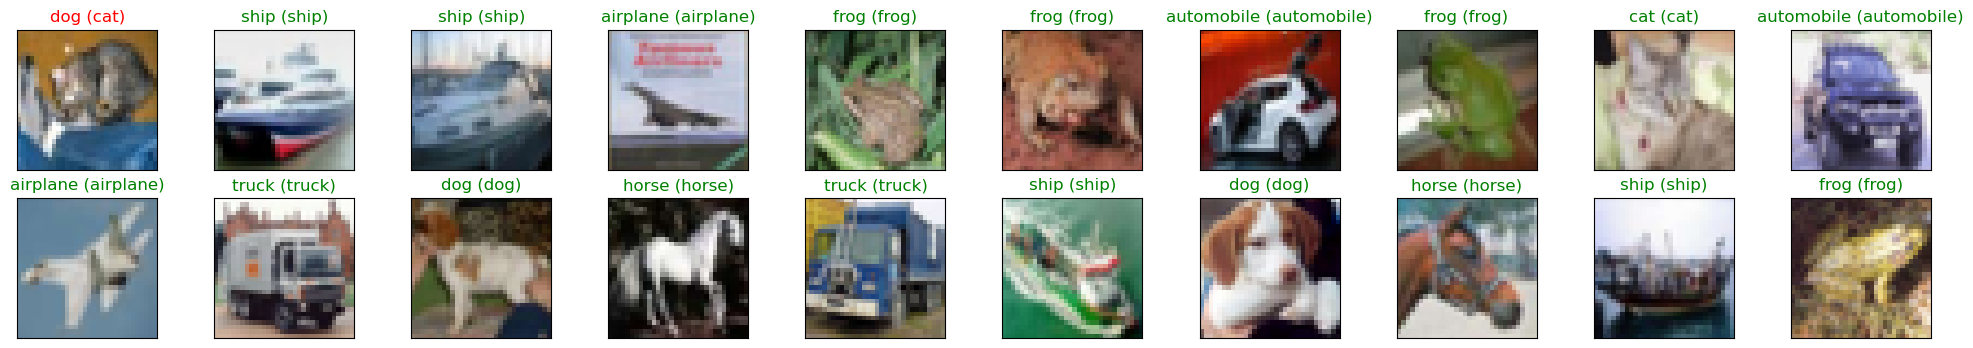

In [60]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)
images.numpy()

# move model inputs to cuda, if GPU available
if train_on_gpu:
    images = images.cuda()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))